## AB Testing of an Online Education Website
AB Testing Exercise - By Sri Harsha Manjunath
[LinkedIn](https://www.linkedin.com/in/srmanj), [Portfolio](https://srmanj.github.io)

Udacity is a popular online learning website where users sign up for courses, gain certifications and get educated in the process. The goal of such a business model is to create an eco-system for the best user & coach experience in order to maximize course completions of the users and as a result generate revenue.

The following cells show the intricacies of an AB Test experiment that aims to improve student, coach experience by improving retention & Net Conversion

The notebook is organized as follows 
1. Problem Statement
    - Current and Proposed conditions
2. Solution Hypothesis
3. Metric Choice

 ### Problem Statement - 
#### Current Conditions (Control Group Conditions) 
1. At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials".
2. If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first.
3. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


#### Proposed  Conditions (Experiment/Treatment Group Conditions)
1. In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.
2. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free.
3. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.

### Solution Hypothesis - 
The new interface will help set clearer expectations for students from the get go, thereby reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. 
If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

In [3]:
import numpy as np

### Metrics Choice

#### Metrics Available - 
1.  **Number of cookies:** Number of unique cookies to view the course overview page. (dmin=3000)
    - `Invariant Metric `
- **Number of user-ids:** Number of users who enroll in the free trial. (dmin=50)
    - `Evaluation Metric` - *Although not very granular, it is definitely something we want to track* 
- **Number of clicks:** Number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is triggered). (dmin=240)
    - `Invariant Metric` - *Since this metric tracks an event that transpires before our treatment it should not change*
- **Click-through-probability:** Number of unique cookies to click the "*Start free trial*" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
    - `Invariant Metric` - Same reason as the previous one
- **Gross conversion:** Number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
    - `Evaluation Metric` - This should be one of our primary signal to indicate the effect of the treatment
- **Retention:** Number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
    - `'Evaluation Metric` - This should again be considered for one of our primary signals to track
- **Net conversion:** Number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)
    - `Invariant Metric` - Since the users who were prone to not staying beyond the 14-day period would be detered by our treatment, we should see the same number of people staying beyond the 14-day period and the same number of people clicking on the Start-Free Trail Button

#### Some Considerations - 
Metrics, on a broad level can be classifed into 2 classes depending on their behavior across the control & experiment groups
1. **Invariant Metrics** - Metrics that do not/should not change across control and experiemnt groups
2. **Evaluation Metrics** - Metrics you track and want to observe change across the control & experiment groups


In this use case, I decided to choose the following as the Evaluation Metric
1. Gross Conversion
2. Retention
3. Net Conversion

### Computing the Variance of the chosen Evaluation Metrics - 

Analytically estimating the Standard Deviation (Standard Error) of the chosen metrics - 

Given some of the baseline values - 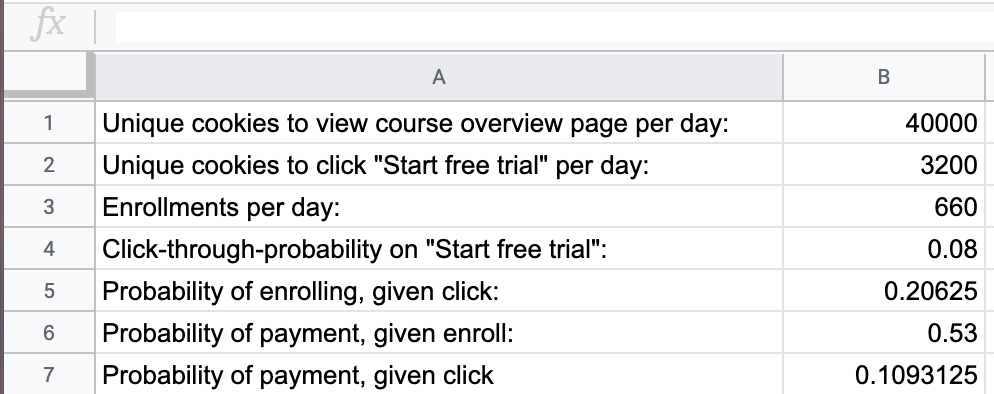

We can compute the standard error of the metrics as 

$ \sqrt{\hat p(1-\hat p)\over N}$

**1. Gross Conversion**

In [4]:
P_Enroll_Click = 0.20625
n = 3200/8
GC_SE = np.sqrt(P_Enroll_Click * (1-P_Enroll_Click)/n)
np.round(GC_SE,5)

0.02023

**2. Retention**

In [5]:
P_Payment_Enroll = 0.53
n = 660/8
Ret_SE = np.sqrt(P_Payment_Enroll * (1-P_Payment_Enroll)/n)
np.round(Ret_SE,5)

0.05495

**3. Net Conversion**

In [6]:
P_Payment_Click = 0.1093125
n = 3200/8
NC_SE = np.sqrt(P_Payment_Click * (1-P_Payment_Click)/n)
np.round(NC_SE,5)

0.0156

### Computing the Size of the Experiment

One of the interesting parts of running an A/B Test is to size 
the experiment.

The Size is dependent on a couple of factors like
- Baseline Conversion Rate
- Minimum Detectable Effect
- Sensitivity $\beta$
- Significance Level $\alpha$

I will be using this - [Sample Size Calculator](https://www.evanmiller.org/ab-testing/sample-size.html) to compute the numbers for the 3 metrics considered

**1. Gross Conversion** 
- Basline Conversion Rate - 0.20625
- Minimum Detectable Effect - 0.01
- Sensitivity - 0.8
- Significance Level - 0.05

**Sample Size = 25,835**

**2. Retention** 
- Basline Conversion Rate - 0.53
- Minimum Detectable Effect - 0.01
- Sensitivity - 0.8
- Significance Level - 0.05

**Sample Size = 39,115**

**2. Net Conversion** 
- Basline Conversion Rate - 0.1093125
- Minimum Detectable Effect - 0.0075
- Sensitivity - 0.8
- Significance Level - 0.05

**Sample Size = 27,413**

Now, to compute the total number of page views we need to successfully run this experiment  = $2 \times Sample Size \times {Unique Cookies/day \over Unique cookies to click start free Trial/day}$


In [7]:
print ("Gross Conversion - ", 2 * 25835 * 40000 / 3200.0)
print ("Retention -  ", 2 * 39115 * 40000 / 660.0)
print ("Net Conversion - ", 2 * 27413 * 40000 / 3200.0)

Gross Conversion -  645875.0
Retention -   4741212.121212121
Net Conversion -  685325.0


### Traffic Diversion

The amount of traffic we would like to divert towards this experiment can have a massive impact on the customer experience. Depending on the kind of change we are testing, we need to be careful what we expose the user base to. 

As known, when a user is exposed to a new change we can expect most of the reactions to fall under 2 categories
1. **Change Aversion** - When a user hates the new changes and is less incentivised to use the platform
2. **Novelty Effect** - When the user loves the changes and explores what new, the platform has to offer


To ensure, the experiment does not polarize the user into a change aversion effect we need to consider how big of a change our experiment is. 

Although in our case it is not a lot, we are only showing an extra pop-up banner for new users signing up for courses, we may or may not see a lot of user turning away because of the experiment.

Some of the other reasons must also be considered for evaluating the practicality of the experiment.

From the sizing numbers above -
- Knowing we need 4,741,212 page views, and we see about 40,000 unique cookie page views a day. It would take us approximatley 118 days to run the experiment with 100% Traffic.
    - This does not sound like the best idea. However, the only metric that would require this amount of page views is Retention. 
- Dropping Retention allows to us to look at the next metric with the highest number of page views required. i.e. Net Conversion
    - With 685,325 page views needed, we can complete this experiment in **18 days** by diverting **100%** of the traffic and **28 days** with just **60%** of the traffic

### Recommendation - 
Although we have the luxury of being able to complete the experiment in 18 days, **I would recommend that we run the experiment for 28 days with 60% Traffic part of to the experiment gathering a total of 685,325 Page Views**

This way not only avoid alienating the user base but we also get to observe user patters by allowing the experiment to run for a longer duration which would'nt have surfaced otherwise



### Sanity Checks - 
We need to make sure, our experiment ran without any inconsitencies. 
We do this by running a few Sanity Checks on the data gathered by the experiment.

Especially the Invariant Metrics as we expect them to remain the same across both the Control & Experiment Groups.

Meaning, there were equal chances that a certain cookie was assigned to either of the groups. i.e. P(Control/Expt) = 0.5

This way we can model the above as a Binomial Distribution.

In [8]:
# Importing the data
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [9]:
control = pd.read_excel(os.getcwd()+"/Data/Final Project Results.xlsx", sheet_name = "Control")
experiment = pd.read_excel(os.getcwd()+"/Data/Final Project Results.xlsx", sheet_name = "Experiment")

# Filtering out the data for days when we do not have Enrollment & Payments Data
control_subset = control[:23]
experiment_subset = experiment[:23]


In [10]:
print(control.head())
print(experiment.head())

          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7723     687        134.0      70.0
1  Sun, Oct 12       9102     779        147.0      70.0
2  Mon, Oct 13      10511     909        167.0      95.0
3  Tue, Oct 14       9871     836        156.0     105.0
4  Wed, Oct 15      10014     837        163.0      64.0
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7716     686        105.0      34.0
1  Sun, Oct 12       9288     785        116.0      91.0
2  Mon, Oct 13      10480     884        145.0      79.0
3  Tue, Oct 14       9867     827        138.0      92.0
4  Wed, Oct 15       9793     832        140.0      94.0


Each of these datsets have 36 rows of data, with Enrollments & Payments till Row 23. (Since our experiment can capture these fields only after 14 days of Enrollment and hence the payment)

### Gross Conversion

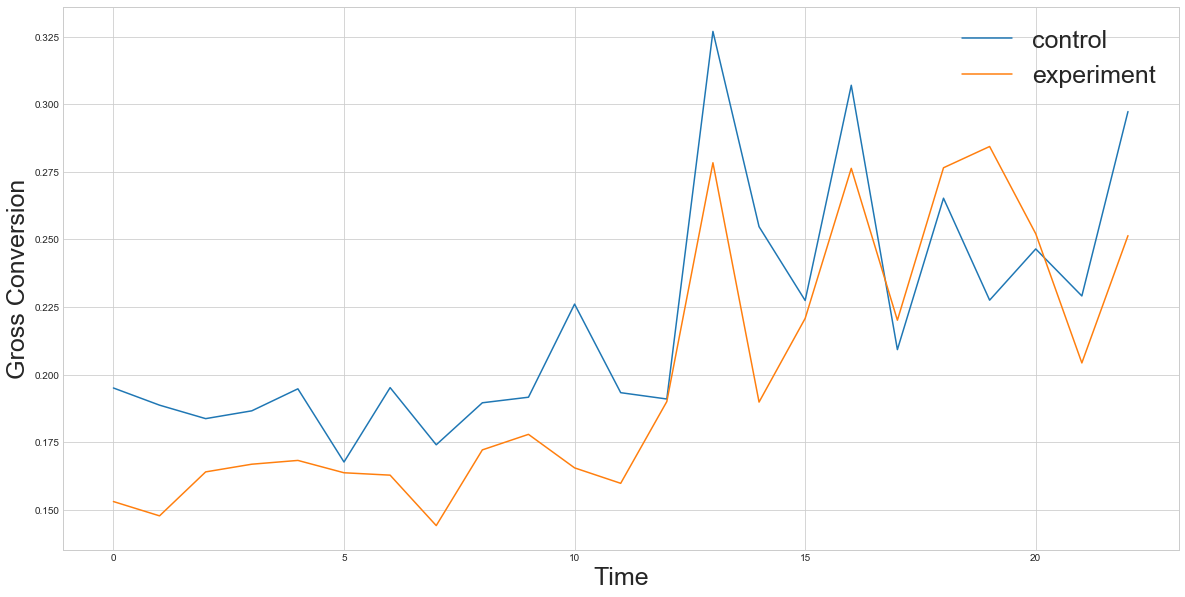

In [12]:
plt.plot(control_subset['Enrollments']/control_subset['Clicks'], label='control')
plt.plot(experiment_subset['Enrollments']/experiment_subset['Clicks'], label='experiment')

plt.ylabel('Gross Conversion', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.rcParams["figure.figsize"] = (20,10)
plt.legend(loc='upper right', frameon=False,fontsize=25)

### Net Conversion

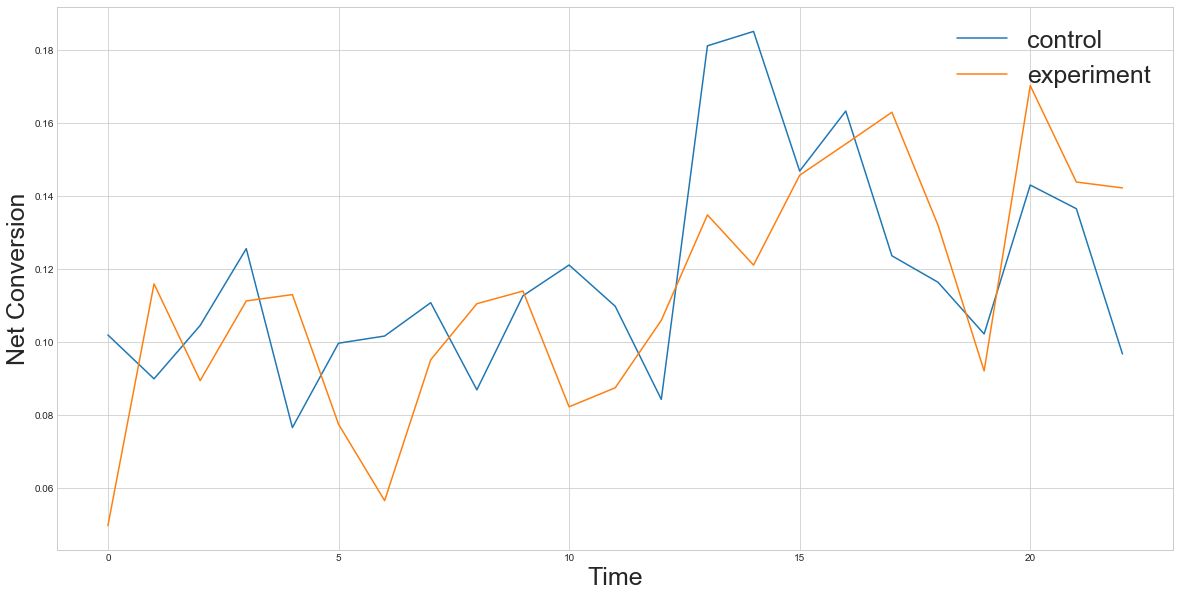

In [13]:
plt.plot(control_subset['Payments']/control_subset['Clicks'], label='control')
plt.plot(experiment_subset['Payments']/experiment_subset['Clicks'], label='experiment')

plt.ylabel('Net Conversion', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.rcParams["figure.figsize"] = (20,10)
plt.legend(loc='upper right', frameon=False,fontsize=25)

#### Total Clicks & Pageviews on each experiment groups
**1. Control Group**

In [14]:
print("Clicks - ",control['Clicks'].sum())
print("Pageviews - ", control['Pageviews'].sum())

Clicks -  28378
Pageviews -  345543


**2. Experiment Group**

In [15]:
print("Clicks - ",experiment['Clicks'].sum())
print("Pageviews - ", experiment['Pageviews'].sum())

Clicks -  28325
Pageviews -  344660


**Some of the Invarint Metrics considered**
1. Number of Cookies
2. Number of Clicks on "Start Free Trial"
3. Click Through Probability on "Start Free Trial"

### 1. No. of Cookies

In [16]:
p = 0.5

#Standard Error
SE = np.round(np.sqrt(p * p / (345543 + 344660)),6)
print ("Standard Error:", SE)

# Margin of Error
ME = np.round(SE * 1.96,6)
print ("Margin of error:", ME)
(LB, UB) = (p - ME, p + ME)
print ("Confidential Interval  - Lower Bound:", LB)
print ("Confidential Interval  - Upper Bound:", UB)
print ("Estimated P:", np.round(345543.0 / (345543 + 344660),5))

Standard Error: 0.000602
Margin of error: 0.00118
Confidential Interval  - Lower Bound: 0.49882
Confidential Interval  - Upper Bound: 0.50118
Estimated P: 0.50064


#### Lies within the estimated Confidence Interval

### 2. Number of Clicks on "Start Free Trial"

In [17]:
p = 0.5

#Standard Error
SE = np.round(np.sqrt(p * p / (28378 + 28325)),6)
print ("Standard Error:", SE)

# Margin of Error
ME = np.round(SE * 1.96,6)
print ("Margin of error:", ME)
(LB, UB) = (p - ME, p + ME)
print ("Confidential Interval  - Lower Bound:", LB)
print ("Confidential Interval  - Upper Bound:", UB)
print ("Estimated P:", np.round(28378.0 / (28378 + 28325),5))

Standard Error: 0.0021
Margin of error: 0.004116
Confidential Interval  - Lower Bound: 0.495884
Confidential Interval  - Upper Bound: 0.504116
Estimated P: 0.50047


#### Lies within the estimated Confidence Interval

### 3. Click Through Probability on "Start Free Trial"

In [18]:
Pooled_P = 1 * (28378 + 28325) / (345543 + 344660)

#Standard Error
SE = np.round(np.sqrt(Pooled_P * (1-Pooled_P) * (1.0 / 345543 + 1.0 / 344660)),8)
print ("Standard Error:", SE)

# Margin of Error
ME = np.round(SE * 1.96,8)
print ("Margin of error:", ME)

(LB, UB) = (0 - ME, 0 + ME)
print ("Confidential Interval  - Lower Bound:", LB)
print ("Confidential Interval  - Upper Bound:", UB)

# Difference 
d = 28325.0 / 344660 - 28378.0 / 345543
print("Difference:",d)

Standard Error: 0.00066106
Margin of error: 0.00129568
Confidential Interval  - Lower Bound: -0.00129568
Confidential Interval  - Upper Bound: 0.00129568
Difference: 5.662709158693602e-05


#### Difference Lies within the estimated Confidence Interval

### Recommendation - 
From the above 3 computations, we can see that the estimated probaility that a random cookie was placed in either a Control group or an Experiment Group is based on Chance alone.

**This verifies that there was no external or unknown factor at play that could have led to weird experiment numbers.**

We can now proceed with the Analysis

### Analysis

$H_0:$ Any difference observed on the metrics under consideration, between the 2 groups is due to chance alone

$H_1$: The difference observed between the 2 groups is statistically significant and not due to chance

So, we can test our 2 metrics under consideration for statistical and practical significance.

**Expectations **
1. We expect the Net Conversion to remain unchanged between the 2 groups and hence show no significance
2. We also expect the Gross Conversion to show significance if our experiment has indeed worked

In [19]:
# Summary
print ("Control group:")
print ("Clicks = ", control_subset['Clicks'].sum(), "   ", \
"Enrollments = ", control_subset['Enrollments'].sum(), "   ", \
"Payments = ", control_subset['Payments'].sum())
print ("Experimental group:")
print ("Clicks = ", experiment_subset['Clicks'].sum(), "   ", \
"Enrollments = ", experiment_subset['Enrollments'].sum(), "   ", \
"Payments = ", experiment_subset['Payments'].sum())

Control group:
Clicks =  17293     Enrollments =  3785.0     Payments =  2033.0
Experimental group:
Clicks =  17260     Enrollments =  3423.0     Payments =  1945.0


#### 1. Net Conversion

In [27]:
p_pool = np.round(1.0 * (2033.0 + 1945.0) / (17293 + 17260),5)
print ("Pooled probability:", p_pool)
SE = np.round(np.sqrt(p_pool * (1 - p_pool) * (1.0 / 17293 + 1.0 / 17260)),5)
print("Standard error:", SE)

ME = np.round(SE * 1.96,5)
print("Margin of error:", ME)

d = np.round(1945.0 / 17260 - 2033.0 / 17293,5)
print ("Difference:", d)

LB = np.round(d - ME,5)
UB = np.round(d + ME,5)

print("Confidential Interval  - Lower Bound:", LB)
print("Confidential Interval  - Upper Bound:", UB)

Pooled probability: 0.11513
Standard error: 0.00343
Margin of error: 0.00672
Difference: -0.00487
Confidential Interval  - Lower Bound: -0.01159
Confidential Interval  - Upper Bound: 0.00185


### Conclusion - 
 Not Statistically Significant

#### 2. Gross Conversion

In [37]:
p_pool = 1.0 * (3785.0 + 3423.0) / (17293 + 17260)
print ("Pooled probability:", p_pool)

SE = np.round(np.sqrt(p_pool * (1 - p_pool) * (1.0 / 17293 + 1.0 / 17260)),5)
print ("Standard error:", SE)

ME = np.round(SE * 1.96,5)
print ("Margin of error:", ME)

d = np.round(3423.0 / 17260 - 3785.0 / 17293,5)
print ("Difference:", d)

LB = np.round(d - ME,5)
UB = np.round(d + ME,5)

print("Confidential Interval  - Lower Bound:", LB)
print("Confidential Interval  - Upper Bound:", UB)

Pooled probability: 0.20860706740369866
Standard error: 0.00437
Margin of error: 0.00857
Difference: -0.02055
Confidential Interval  - Lower Bound: -0.02912
Confidential Interval  - Upper Bound: -0.01198


### Conclusion - 
Statistically Significant. 

Since the $d_{min}$ for Gross Conversion was 0.01 and we see an absolute change of 0.02 we can conclude there is a practical significance along with statistical

### Sign Test - 

It is possible that the significance we saw above is a result of **Simpsons Paradox**
To verify that it is not so, and there is indeeed significance in our results, we can check for the number of days we saw a significant change in the Gross Conversion Metric.

Then we can use this [calculator](https://www.graphpad.com/quickcalcs/binomial1.cfm) to ensure the results we saw were not due to chance

#### 1. Net Conversion

In [51]:
Total_days = experiment_subset['Payments']/experiment_subset['Clicks']
Successful_days = experiment_subset['Payments']/experiment_subset['Clicks'] >control_subset['Payments']/control_subset['Clicks']
print("Successful Days - ",Successful_days.sum())
print("Total Days - ",Successful_days.count())

Successful Days -  10
Total Days -  23


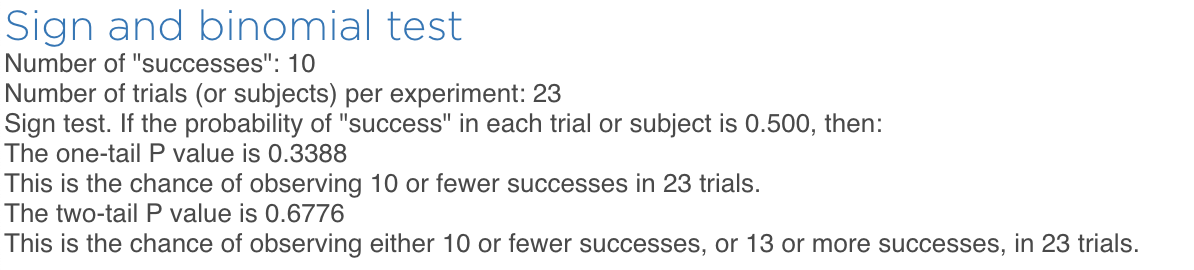

#### 2. Gross Conversion

In [50]:
Total_days = experiment_subset['Enrollments']/experiment_subset['Clicks']
Successful_days = experiment_subset['Enrollments']/experiment_subset['Clicks'] >control_subset['Enrollments']/control_subset['Clicks']
print("Successful Days - ",Successful_days.sum())
print("Total Days - ",Successful_days.count())

Successful Days -  4
Total Days -  23


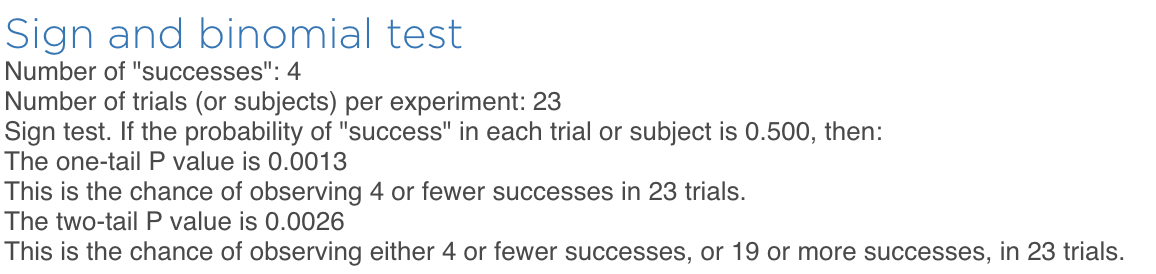


## Final Recommendation - 
The chances that we see these results in Gross Conversion are at 0.26% and we can confidently reject the Null


Since we have seen that the metrics have behaved as we hoped they would and we have further verified the non-existence of False Positive in our experiment results, We can finally make a decision if we want to recommend the rollout to the Business. 


My recommendation would be to gradually ramp up the change to user base. Since this is not a massive deviation from what users typically experience, It should not negatively affect the platform in any way. 

We have further verified that the changes observed have not been due to chance. Additionally, gradually ramping up the release gives us sometime to double check our implementation and ensure it is indeed working. 